In [103]:
# imports
import pandas as pd
import numpy as np

In [104]:
df = pd.read_csv("Serie-casos-2018.csv")
df.head()

,BR Cod Mun Infecção,NM MUN (MUNINF.csv),Year of BR Data de Notificação,Number of Records
0,110001,Alta Floresta D'Oeste,2018,2
1,110001,Alta Floresta D'Oeste,2017,2
2,110001,Alta Floresta D'Oeste,2016,6
3,110001,Alta Floresta D'Oeste,2015,30
4,110001,Alta Floresta D'Oeste,2014,79


In [105]:
# Renomeando as colunas
df.rename(columns={'BR Cod Mun Infecção':'Codigo', 'NM MUN (MUNINF.csv)':'Municipio',
                 'Year of BR Data de Notificação':'Ano', 'Number of Records':'Casos'},
         inplace=True)

In [106]:
df['Municipio'].value_counts()

Presidente Médici          16
Rio Branco                 13
Tapauá                     12
Tonantins                  12
Uarini                     12
                           ..
Glória D'Oeste              1
Governador Edison Lobão     1
Graça Aranha                1
Dom Aquino                  1
Couto Magalhães             1
Name: Municipio, Length: 652, dtype: int64

In [107]:
# Agrupando por município para calcular a média e mediana de cada cidade durante o período
grouped = df.groupby('Municipio')

newCSV = grouped['Casos'].agg([np.mean, np.median, np.sum])
newCSV

,mean,median,sum
Municipio,,,
Abaetetuba,3.818182,4.0,42
Abel Figueiredo,3.142857,2.0,22
Acará,7.800000,7.5,78
Acorizal,1.750000,1.5,7
Acrelândia,197.000000,96.5,2364
...,...,...,...
Zé Doca,46.500000,14.5,465
Água Azul do Norte,2.428571,2.0,17
Água Boa,15.000000,14.0,60


In [108]:
# Escrevendo um novo arquivo csv
newCSV.to_csv("Serie-casos-mod.csv")

# Cluterização

In [109]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


In [167]:
data = pd.read_csv("Serie-casos-mod.csv")

X = data.values[:,1:]
X = np.nan_to_num(X)
data.max()

Municipio          Óbidos
mean         17388.416667
median            16627.0
sum                208661
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

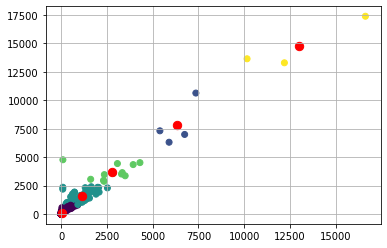

In [164]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 10, max_iter=300)
pred_y = k_means.fit_predict(X)
plt.scatter(X[:,1], X[:,0], c = pred_y)
plt.grid()
plt.scatter(k_means.cluster_centers_[:,1], k_means.cluster_centers_[:,0], s=70, c='red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

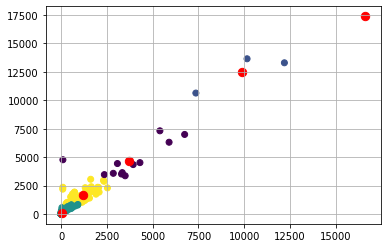

In [160]:
k_means = KMeans(init = "random", n_clusters = 5, n_init = 10, max_iter=100)
pred_y = k_means.fit_predict(X)
plt.scatter(X[:,1], X[:,0], c = pred_y)
plt.grid()
plt.scatter(k_means.cluster_centers_[:,1], k_means.cluster_centers_[:,0], s=70, c='red')
plt.show